In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Set up 3 important function for Bg_Subtraction

In [17]:
def computeDifference(bg_img, input_img):
    """
        Parameters:
    - bg_img: The background image.
    - input_img: The image with the object on the background.\n
        Returns:
    - diff_1_channel
    """
    # Tính diff giữa 2 ảnh
    diff_3_channel = np.abs(bg_img - input_img)

    # Tính tổng diff của cả 3 nền RGB rồi chia 3 (axis = 2)
    diff_1_channel = np.sum(diff_3_channel, axis=2) / 3.0

    # Chuyển đổi lại sang uint8 để phù hợp cho xử lý ảnh
    diff_1_channel = diff_1_channel.astype("uint8")
    return diff_1_channel


def computeBinaryMask(diff_1_channel, threshold=15):
    # Áp dụng ngưỡng ( threshold ) để tạo mask nhị phân
    # Các điểm ảnh có sự chênh lệch màu sắc lớn hơn hoặc bằng 15 được đặt là 255(trắng), còn lại là 0 (đen).
    binary_mask = np.where(diff_1_channel > threshold, 255, 0)

    # Ghép nối binary_mask thành 3 kênh để phù hợp với RGB
    bina_3_mask = np.stack((binary_mask,) * 3, axis=-1)
    return bina_3_mask


def replaceBackGround(bg_img1, bg_img2, ob_img):
    diff_1_channel = computeDifference(bg_img1, ob_img)
    binary_3_mask = computeBinaryMask(diff_1_channel, threshold=15)
    new_img = np.where(binary_3_mask == 255, ob_img, bg_img2)
    return new_img

# Input the image

In [18]:
bg_img1 = cv2.imread("Background_Subtraction/back_ori.png")
ob_img = cv2.imread("Background_Subtraction/vovinam.jpg")
bg_img2 = cv2.imread("Background_Subtraction/back1.jpg")

In [19]:
# Resize the input image
new_size = (768,1366)
bg_img1 = cv2.resize(bg_img1,dsize=new_size)
bg_img2 = cv2.resize(bg_img2,dsize=new_size)
ob_img = cv2.resize(ob_img,dsize=new_size)

# Convert the image from BRG to RGB
bg_img1 = cv2.cvtColor(bg_img1,cv2.COLOR_BGR2RGB)
bg_img2 = cv2.cvtColor(bg_img2,cv2.COLOR_BGR2RGB)
ob_img = cv2.cvtColor(ob_img,cv2.COLOR_BGR2RGB)

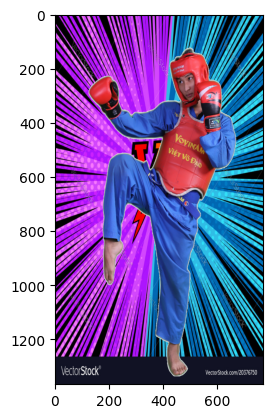

In [20]:
new_img = replaceBackGround(bg_img1, bg_img2, ob_img)
plt.imshow(new_img)